In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns  #advanced visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import requests, zipfile, io
import warnings

warnings.filterwarnings('ignore')
df_train=pd.read_csv("/content/train.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [0]:
def f(x):
  if  x=="Y":
    return 1 
  else :
    return 0 
df_train.Loan_Status=df_train.Loan_Status.apply(f)
Y=df_train.Loan_Status
ID=df_train.Loan_ID
df_train=df_train.drop(['Loan_ID'], axis=1)


In [0]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )


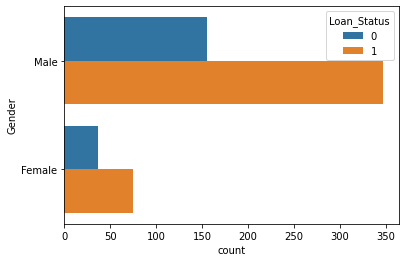

In [0]:
sns.countplot(y='Gender',hue='Loan_Status',data=df_train)

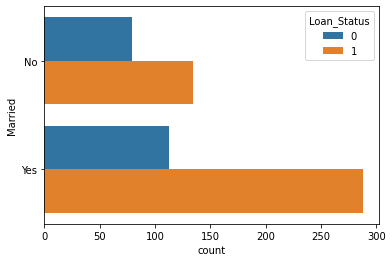

In [0]:
sns.countplot(y='Married',hue='Loan_Status',data=df_train)

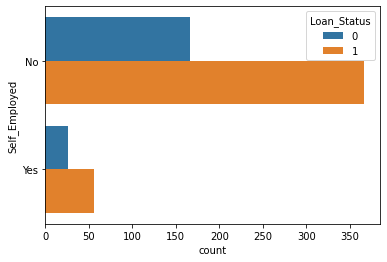

In [0]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df_train)

In [0]:
df_train['total_income']=df_train.ApplicantIncome+df_train.CoapplicantIncome

In [0]:
df_train['loan_ratio']=df_train.LoanAmount/df_train.total_income

In [0]:
df_train=pd.get_dummies(df_train)

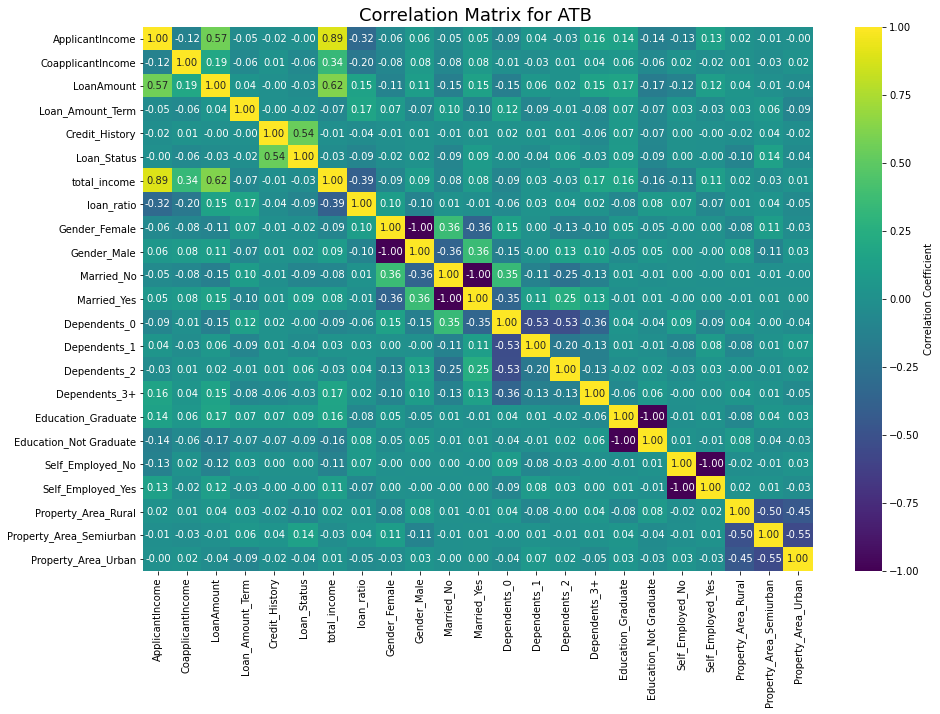

In [0]:
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Correlation Coefficient'}, cmap='viridis')
ax.set_title("Correlation Matrix for ATB ", fontsize=18)
plt.show()

In [0]:
df_train=df_train.drop(["Loan_Status"],axis=1)


In [0]:

df_train=df_train.drop(["Education_Not Graduate", 'Gender_Male', 'Married_No','Self_Employed_Yes'], axis=1)


X_train, val_X, Y_train, val_y = train_test_split(df_train, Y,random_state=0)


In [39]:
from sklearn.metrics import roc_auc_score,roc_curve , accuracy_score

lr=LogisticRegression()
lr.fit(X_train,Y_train)
preds = lr.predict(val_X)
preds1 = lr.predict(X_train)

val_mae2=accuracy_score(val_y, preds)
val_mae1=accuracy_score(Y_train, preds1)
print(val_mae1)
val_mae2

0.8


0.8181818181818182

cbc: ROC AUC=0.820


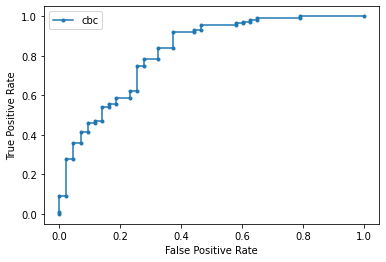

In [38]:
# predict probabilities
lr_probs = lr.predict_proba(val_X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(val_y, lr_probs)
# summarize scores
print('cbc: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(val_y, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='cbc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
coefs=pd.DataFrame()
coefs['features']=X_train.columns
coefs['coefs']=lr.coef_[0]
coefs

,features,coefs
0,ApplicantIncome,0.000026
1,CoapplicantIncome,-0.000053
2,LoanAmount,-0.001325
3,Loan_Amount_Term,-0.005925
4,Credit_History,2.252126
5,total_income,-0.000027
6,loan_ratio,-0.006532
7,Gender_Female,0.040334
8,Married_Yes,0.514051
9,Dependents_0,0.068740


In [33]:
from sklearn.metrics import confusion_matrix
predic = lr.predict(val_X)
confusion_matrix(val_y,predic)

array([[ 20,  23],
       [  5, 106]])

In [45]:
df_train['probabilty to be accepted']= lr.predict_proba(df_train)[:,1]
df_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,loan_ratio,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,probabilty to be accepted
0,5849,0.0,128.0,360.0,1.0,5849.0,0.021884,0,0,1,0,0,0,1,1,0,0,1,0.715867
1,4583,1508.0,128.0,360.0,1.0,6091.0,0.021015,0,1,0,1,0,0,1,1,1,0,0,0.675218
2,3000,0.0,66.0,360.0,1.0,3000.0,0.022000,0,1,1,0,0,0,1,0,0,0,1,0.789520
3,2583,2358.0,120.0,360.0,1.0,4941.0,0.024287,0,1,1,0,0,0,0,1,0,0,1,0.661799
4,6000,0.0,141.0,360.0,1.0,6000.0,0.023500,0,0,1,0,0,0,1,1,0,0,1,0.712301
